In [2]:
#Filip Rutka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_cracow = pd.read_csv('cracow.csv', index_col=0)
data_cracow.head(15)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Year,,,,,,
1743,4.269,1.781,Cracow,Poland,50.63N,19.01E
1743,NaN,NaN,Cracow,Poland,50.63N,19.01E
1744,NaN,NaN,Cracow,Poland,50.63N,19.01E
1744,NaN,NaN,Cracow,Poland,50.63N,19.01E
1744,NaN,NaN,Cracow,Poland,50.63N,19.01E
1744,9.463,2.674,Cracow,Poland,50.63N,19.01E
1744,12.226,1.486,Cracow,Poland,50.63N,19.01E
1744,15.071,1.410,Cracow,Poland,50.63N,19.01E
1744,17.406,1.414,Cracow,Poland,50.63N,19.01E


In [3]:
print(data_cracow['AverageTemperatureUncertainty'].isnull())

Year
1743    False
1743     True
1744     True
1744     True
1744     True
        ...  
2013    False
2013    False
2013    False
2013    False
2013     True
Name: AverageTemperatureUncertainty, Length: 3239, dtype: bool


In [4]:
cleaned_data_cracow = data_cracow[data_cracow.index <= 2012]
cleaned_data_cracow = cleaned_data_cracow[cleaned_data_cracow.index >= 1753]
print(cleaned_data_cracow['AverageTemperatureUncertainty'].isnull().sum())

0


In [5]:
cleaned_data_cracow = cleaned_data_cracow.drop(['City','Country','Latitude','Longitude'],axis=1)

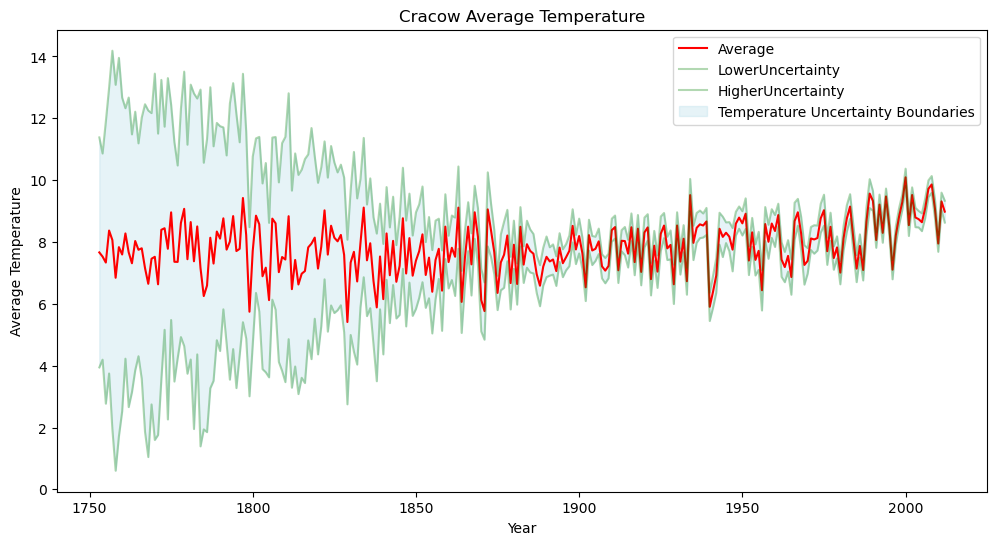

In [6]:
mean_temp = cleaned_data_cracow.groupby(cleaned_data_cracow.index).mean()
mean_temp['LandLowerTemperature'] = mean_temp['AverageTemperature'] - mean_temp['AverageTemperatureUncertainty']
mean_temp['LandHigherTemperature'] = mean_temp['AverageTemperature'] + mean_temp['AverageTemperatureUncertainty']
mean_temp

plt.figure(figsize=(12,6))
plt.plot(mean_temp.index,mean_temp['AverageTemperature'],color='red', label='Average')
plt.plot(mean_temp.index, mean_temp['LandLowerTemperature'], color='green', alpha=0.3,label = 'LowerUncertainty')
plt.plot(mean_temp.index, mean_temp['LandHigherTemperature'], color='green', alpha=0.3,label = 'HigherUncertainty')
plt.fill_between(mean_temp.index, mean_temp['LandLowerTemperature'], mean_temp['LandHigherTemperature'], color='lightblue', alpha=0.3, label='Temperature Uncertainty Boundaries')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Cracow Average Temperature')
plt.legend(loc='best')
plt.show()

In [7]:
cleaned_data_cracow = cleaned_data_cracow[cleaned_data_cracow.index >= 1753]

In [8]:
cleaned_data_cracow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 1753 to 2012
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             3120 non-null   float64
 1   AverageTemperatureUncertainty  3120 non-null   float64
dtypes: float64(2)
memory usage: 73.1 KB


In [9]:
yearly_data = cleaned_data_cracow['AverageTemperature']
Y = yearly_data.groupby(yearly_data.index).mean()
X = Y.index
X = X.to_numpy()
Y = Y.to_numpy()
len(X)

260

In [10]:
#dziele trening i test w stosunku 9/1 oraz 4/1
rest1 = int(0.1*len(X))
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
X_90 = X[:len(X)-rest1]
X_10 = X[len(X)-rest1:]
Y_90 = Y[:len(X)-rest1]
Y_10 = Y[len(X)-rest1:]
Y_90


array([[7.66316667],
       [7.52766667],
       [7.33483333],
       [8.36983333],
       [8.064     ],
       [6.84291667],
       [7.83341667],
       [7.59541667],
       [8.27591667],
       [7.66591667],
       [7.3115    ],
       [8.031     ],
       [7.74766667],
       [7.7965    ],
       [7.15908333],
       [6.64841667],
       [7.45741667],
       [7.52091667],
       [6.63166667],
       [8.39408333],
       [8.4445    ],
       [7.78058333],
       [8.95825   ],
       [7.35975   ],
       [7.35566667],
       [8.61566667],
       [9.07158333],
       [7.44291667],
       [8.64366667],
       [7.37633333],
       [8.50258333],
       [7.15975   ],
       [6.25125   ],
       [6.5905    ],
       [8.13708333],
       [7.30216667],
       [8.3375    ],
       [8.10875   ],
       [8.76433333],
       [7.75325   ],
       [8.01316667],
       [8.83683333],
       [7.70683333],
       [7.77841667],
       [9.42225   ],
       [8.222     ],
       [5.74466667],
       [7.708

In [11]:
rest2 = int(0.2*len(X))
X_80 = X[:len(X)-rest2]
X_20 = X[len(X)-rest2:]
Y_80 = Y[:len(X)-rest2]
Y_20 = Y[len(X)-rest2:]


In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils

seed=123

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

grid_LR_90 = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1,2,3,4,5]},
                    cv=5,return_train_score=True)
grid_LR_90.fit(X_90, Y_90.ravel())
grid_LR_90.best_params_

{'polynomialfeatures__degree': 2}

In [14]:
grid_LR_80 = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1,2,3,4,5]},
                    cv=5,
                    return_train_score=True)
grid_LR_80.fit(X_80, Y_80.ravel())
grid_LR_80.best_params_

{'polynomialfeatures__degree': 2}

In [15]:
from sklearn.linear_model import ElasticNet


param_grid_EN = {
    'en__alpha': [0.1, 1.0, 10.0, 100.0],
    'en__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

grid_EN_90 = GridSearchCV(estimator=Pipeline([('preprocessing', StandardScaler()), ('en',ElasticNet())]), param_grid=param_grid_EN, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_EN_90.fit(X_90, Y_90.ravel())
grid_EN_90.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.7; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.7; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.7; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.7; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.7; total time=   0.0s
[CV] END ...................

{'en__alpha': 1.0, 'en__l1_ratio': 0.5}

In [16]:
grid_EN_80 = GridSearchCV(estimator=Pipeline([('preprocessing', StandardScaler()), ('en',ElasticNet())]), param_grid=param_grid_EN, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_EN_80.fit(X_80, Y_80.ravel())
grid_EN_80.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s

[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.1; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s

[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__l1_ratio=0.7; total time=   0.0s[CV] END ....................en__alpha=0.1, en__l1_ratio=0.5; total time=   0.0s
[CV] END ....................en__alpha=0.1, en__

{'en__alpha': 1.0, 'en__l1_ratio': 0.5}

In [17]:
from sklearn.svm import SVR

param_grid_SVR = {
    'svr__degree': [2, 3, 4],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5]
}

grid_SVR_90 = GridSearchCV(estimator=Pipeline([('preprocessing', StandardScaler()), ('svr',SVR(kernel='poly'))]), param_grid=param_grid_SVR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_SVR_90.fit(X_90, Y_90.ravel())
grid_SVR_90.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s

[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.2; total time=   0.0s

[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.2; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr

{'svr__C': 0.1, 'svr__degree': 2, 'svr__epsilon': 0.01}

In [18]:
grid_SVR_80 = GridSearchCV(estimator=Pipeline([('preprocessing', StandardScaler()), ('svr',SVR())]), param_grid=param_grid_SVR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_SVR_80.fit(X_80, Y_80.ravel())
grid_SVR_80.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s
[CV] END .......svr__C=0.1, svr__degree=2, svr__epsilon=0.01; total time=   0.0s[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s

[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.2; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.1; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr__epsilon=0.2; total time=   0.0s
[CV] END ........svr__C=0.1, svr__degree=2, svr

{'svr__C': 1, 'svr__degree': 2, 'svr__epsilon': 0.01}

In [19]:
from sklearn import metrics


models_90 = []
models_90.append(('LR', grid_LR_90.best_estimator_))
models_90.append(('Elastic Net', grid_EN_90.best_estimator_))
models_90.append(('SVR rbf', grid_SVR_90.best_estimator_))

r2_90 = []
squared_error_90 = []
mean_absolute_error_90 = []

for name, model in models_90:
    print(name)
    print("squared_error {}".format(metrics.mean_squared_error(Y_10, model.predict(X_10)) ))
    print("mean_absolute_error {}".format(metrics.mean_absolute_error(Y_10, model.predict(X_10)) ))

    squared_error_90.append(metrics.mean_squared_error(Y_10, model.predict(X_10)))
    mean_absolute_error_90.append(metrics.mean_absolute_error(Y_10, model.predict(X_10)))

LR
squared_error 0.7789887085191401
mean_absolute_error 0.7481625448991195
Elastic Net
squared_error 1.7902463413329655
mean_absolute_error 1.2130856892395359
SVR rbf
squared_error 1.346281363906854
mean_absolute_error 1.030063553831524


In [20]:
d_90 = {
     'squared_error': squared_error_90, 
     'mean_absolute_error': mean_absolute_error_90,
    }
df = pd.DataFrame(data=d_90)
df.insert(loc=0, column='Method', value=['LR','Elastic Net','SVR rbf'])
df

,Method,squared_error,mean_absolute_error
0,LR,0.778989,0.748163
1,Elastic Net,1.790246,1.213086
2,SVR rbf,1.346281,1.030064


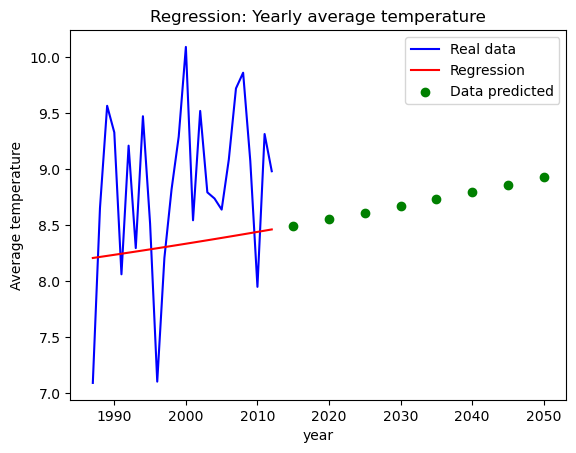

In [21]:
plt.plot(X_10,Y_10, color='blue', label='Real data')
average_pred_y_10 = grid_LR_90.predict(X_10)
plt.plot(X_10, average_pred_y_10, color='red', label='Regression')

Y_pred_90 = grid_LR_90.predict(np.array([2015,2020,2025,2030,2035,2040,2045,2050]).reshape(-1,1))
X_pred_90 = [2015,2020,2025,2030,2035,2040,2045,2050]
plt.scatter(X_pred_90,Y_pred_90,color='green',label='Data predicted')
plt.xlabel('year')
plt.ylabel('Average temperature')
plt.title('Regression: Yearly average temperature')
plt.legend()
plt.show()

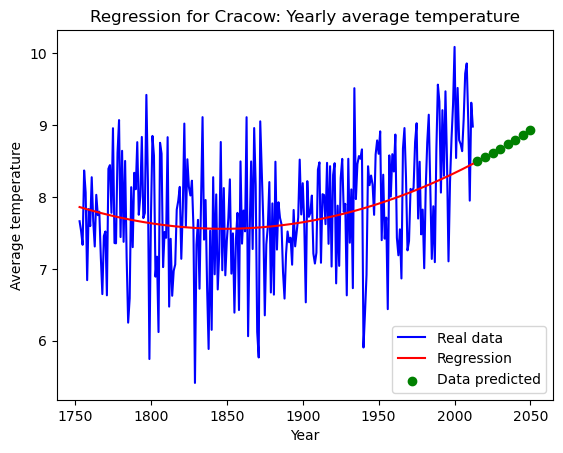

In [22]:
plt.plot(X,Y, color='blue', label='Real data')
average_pred_y_10 = grid_LR_90.predict(X)
plt.plot(X, average_pred_y_10, color='red', label='Regression')

Y_pred_90 = grid_LR_90.predict(np.array([2015,2020,2025,2030,2035,2040,2045,2050]).reshape(-1,1))
X_pred_90 = [2015,2020,2025,2030,2035,2040,2045,2050]
plt.scatter(X_pred_90,Y_pred_90,color='green',label='Data predicted')
plt.xlabel('Year')
plt.ylabel('Average temperature')
plt.title('Regression for Cracow: Yearly average temperature')
plt.legend()
plt.show()

In [23]:
print(grid_LR_90.predict(np.array([2015,2020,2025,2030,2035,2040,2045,2050]).reshape(-1,1)))

[8.49563575 8.55260679 8.61125766 8.67158837 8.73359892 8.7972893
 8.86265952 8.92970957]


In [24]:
models_80 = []
models_80.append(('LR', grid_LR_80.best_estimator_))
models_80.append(('Elastic Net', grid_EN_80.best_estimator_))
models_80.append(('SVR rbf', grid_SVR_80.best_estimator_))

r2_80 = []
squared_error_80 = []
mean_absolute_error_80 = []

for name, model in models_80:
    print(name)
    print("squared_error {}".format(metrics.mean_squared_error(Y_20, model.predict(X_20)) ))
    print("mean_absolute_error {}".format(metrics.mean_absolute_error(Y_20, model.predict(X_20)) ))

    squared_error_80.append(metrics.mean_squared_error(Y_20, model.predict(X_20)))
    mean_absolute_error_80.append(metrics.mean_absolute_error(Y_20, model.predict(X_20)))

LR
squared_error 0.5444089692015616
mean_absolute_error 0.6146671343631537
Elastic Net
squared_error 1.2081666819258579
mean_absolute_error 0.9307799710305724
SVR rbf
squared_error 0.7679206130515528
mean_absolute_error 0.7427475295811793


In [25]:
d_80 = {
     'squared_error': squared_error_80, 
     'mean_absolute_error': mean_absolute_error_80,
    }
df_80 = pd.DataFrame(data=d_80)
df_80.insert(loc=0, column='Method', value=['LR','Elastic Net','SVR rbf'])
df_80

,Method,squared_error,mean_absolute_error
0,LR,0.544409,0.614667
1,Elastic Net,1.208167,0.930780
2,SVR rbf,0.767921,0.742748


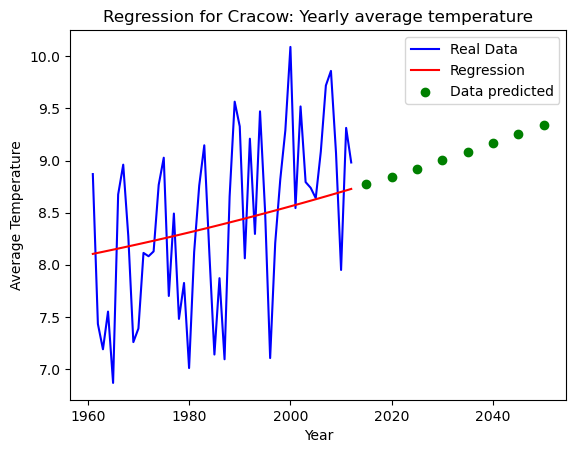

In [26]:
plt.plot(X_20,Y_20, color='blue', label='Real Data')
average_pred_y_20 = grid_LR_80.predict(X_20)
plt.plot(X_20, average_pred_y_20, color='red', label='Regression')

Y_pred_80 = grid_LR_80.predict(np.array([2015,2020,2025,2030,2035,2040,2045,2050]).reshape(-1,1))
X_pred_80 = [2015,2020,2025,2030,2035,2040,2045,2050]
plt.scatter(X_pred_80,Y_pred_80,color='green',label='Data predicted')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Regression for Cracow: Yearly average temperature')
plt.legend()
plt.show()

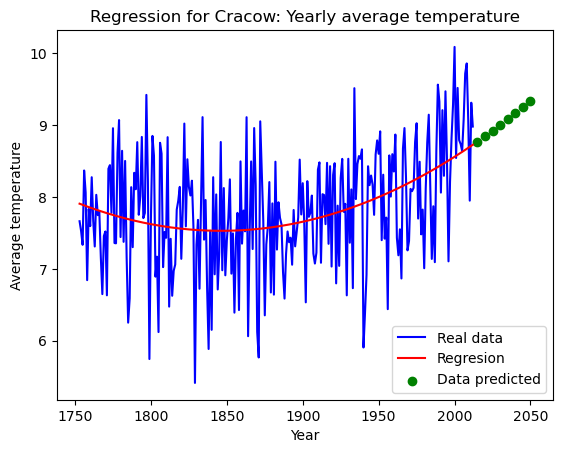

In [27]:
plt.plot(X,Y, color='blue', label='Real data')
average_pred_y_10 = grid_LR_80.predict(X)
plt.plot(X, average_pred_y_10, color='red', label='Regresion')

Y_pred_80 = grid_LR_80.predict(np.array([2015,2020,2025,2030,2035,2040,2045,2050]).reshape(-1,1))
X_pred_80 = [2015,2020,2025,2030,2035,2040,2045,2050]
plt.scatter(X_pred_80,Y_pred_80,color='green',label='Data predicted')
plt.xlabel('Year')
plt.ylabel('Average temperature')
plt.title('Regression for Cracow: Yearly average temperature')
plt.legend()
plt.show()

In [28]:
print(grid_LR_80.predict(np.array([2015,2020,2025,2030,2035,2040,2045,2050]).reshape(-1,1)))

[8.77136298 8.84597204 8.92275794 9.00172067 9.08286025 9.16617667
 9.25166992 9.33934001]
